In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data[:,[2,3]]
y = iris.target
print("Class labels:",np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [4]:
print('Label counts in y:',np.bincount(y))
print('Label counts in y_train:',np.bincount(y_train))
print('Label counts in y_tEST:',np.bincount(y_test))

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_tEST: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)


Perceptron(eta0=0.1, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test!=y_pred).sum())

Misclassified examples: 1


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.978


In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std,y_test))

Accuracy: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    """

    :param X:
    :param y:
    :param classifier:
    :param test_idx:
    :param resolution:
    :return:
    """
    # set up marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                    alpha=0.8,c=colors[idx],
                    marker=markers[idx],label=cl,
                    edgecolors='black')
        # highlight test examples
        if test_idx:
            X_test,y_test = X[test_idx,:],y[test_idx]

            plt.scatter(X_test[:,0],X_test[:,1],
                        c='', edgecolors='black',alpha=1.0,
                        linewidths=1,marker = 'o',
                        s=100,label='test set')


<ipython-input-10-4211ec52e2d8>:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:,0],X_test[:,1],


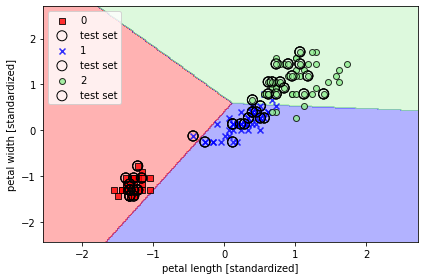

In [11]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combinded = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combinded,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic regression and conditional probabilities

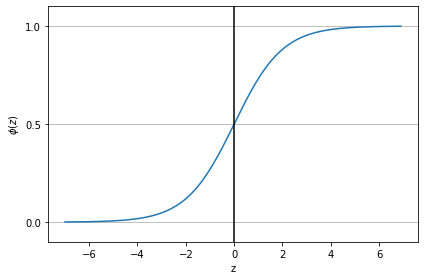

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    """

    :param z:
    :return:
    """
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])
ax =plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()